# Hello Linear Regression

In [1]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2
Pandas Version:  2.2.3


### Generate some linear data samples with added random noise and plot

In [2]:
np.random.seed(73)  # to make this code example reproducible
m = 200  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

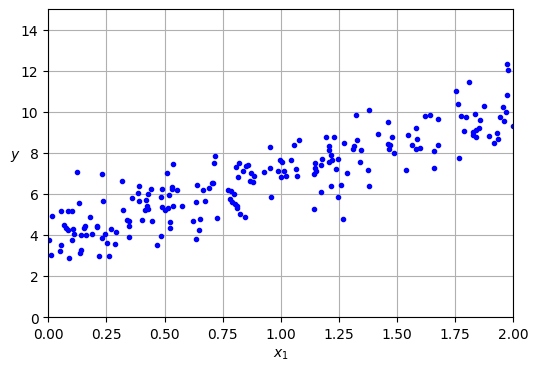

In [3]:
# Plot the synthetic data
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

## Solve in Close form using the Normal Equation

Closed form solution for Theta = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add dummy or intercept (x0 = 1) to make the matrix dimensions to match
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
# Solution using Normal Equation
print(f"Normal Equation closed form solution, intercept = {theta[0]}, slope = {theta[1]}")

Normal Equation closed form solution, intercept = [3.903], slope = [3.062]


Without the added noise to the data, the ideal line intercept would have been 4.0 and slope 3.0

Use model to predict limit values x = 0 and x = 2

In [6]:
X_lim = np.array([[0], [2]])
X_lim_b = add_dummy_feature(X_lim)  # add dummy/intercept
y_predict = X_lim_b @ theta
print(y_predict)

[[ 3.903]
 [10.028]]


Plot data and linear prediction line 

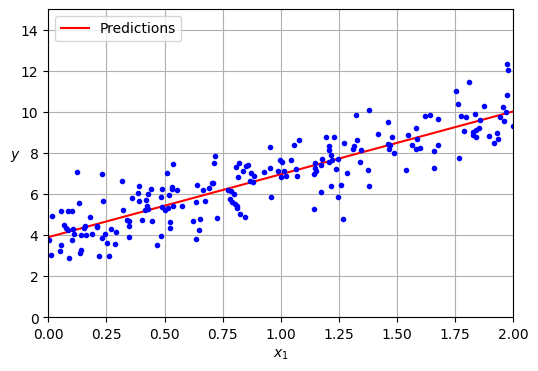

In [7]:
plt.figure(figsize=(6, 4))  
plt.plot(X_lim, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

## Solve with scikit-learn that uses Moore-Penrose Pseudo Inverse

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"scikit-learn Linear Regressor solution, intercept = {lin_reg.intercept_}, slope = {lin_reg.coef_}")

scikit-learn Linear Regressor solution, intercept = [3.903], slope = [[3.062]]


In [9]:
lin_reg.predict(X_lim)

array([[ 3.903],
       [10.028]])

## Solve with Batch Gradient Descent

In [10]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization of model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [41]:
print(f"Batch Gradient Descent solution, intercept = {theta[0]}, slope = {theta[1]}")


Batch Gradient Descent solution, intercept = [3.903], slope = [3.062]


## Solve with Stochastic Gradient Descent

In [43]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization of model parameters

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        

In [44]:
print(f"Stochastic Gradient Descent solution, intercept = {theta[0]}, slope = {theta[1]}")


Stochastic Gradient Descent solution, intercept = [3.921], slope = [3.045]


## Solve with scikit-learn SGD Regressor

In [45]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=73)
sgd_reg.fit(X, y.ravel())  # y.ravel() as fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=73, tol=1e-05)

In [46]:
print(f"scikit-learn SGD solution, intercept = {sgd_reg.intercept_}, slope = {sgd_reg.coef_}")

scikit-learn SGD solution, intercept = [3.903], slope = [3.061]


## Solve with Mini-Batch Gradient Descent

In [47]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients


In [48]:
print(f"Mini-Batch Gradient Descent solution, intercept = {theta[0]}, slope = {theta[1]}")

Mini-Batch Gradient Descent solution, intercept = [3.814], slope = [3.038]
